In [1]:
import deeplenstronomy.deeplenstronomy as dl
from pathlib import Path
import numpy as np
from astropy.visualization import make_lupton_rgb
import matplotlib.pyplot as plt

In [2]:
def rename_result(name, head):
    datapath = head / f'data/{name}'
    imgpath = datapath / 'CONFIGURATION_1_images.npy'
    mdpath = datapath / 'CONFIGURATION_1_metadata.csv'
    if imgpath.exists():
        imgpath.rename(datapath / (datapath.name + '.npy'))
    if mdpath.exists():
        mdpath.rename(datapath / (datapath.name + '_metadata.csv'))

In [4]:
head = Path.cwd().parent.parent
config_file = head / 'sim/configs/multiband_paper_source_final.yaml'
dataset = dl.make_dataset(config_file, verbose=True, save_to_disk=True)

Entering main organization loop
Organizing CONFIGURATION_1
Generating images for CONFIGURATION_1
	Progress: 2.8 %  ---  Elapsed Time: 0 H 0 M 19 S         

KeyboardInterrupt: 

In [ ]:
rename_result('mb_paper_source_final', head)

In [ ]:
head = Path.cwd().parent.parent
config_file = head / 'sim/configs/multiband_paper_target_final.yaml'
dataset = dl.make_dataset(config_file, verbose=True, save_to_disk=True)

In [ ]:
rename_result('mb_paper_target_final', head)

In [125]:
# Define data visualization function
def visualize_data(data):
    '''
    visualizes 16 random images from dataset
    '''
    
    data_length = len(data)
    num_indices = 16
    
    # Generate 15 unique random indices using numpy
    random_indices = np.random.choice(data_length, size=num_indices, replace=False)

    #plot the examples for source
    fig1=plt.figure(figsize=(8,8))

    for i in range(16):
        plt.subplot(4, 4, i + 1)
        plt.axis("off")

        img = data[random_indices[i]]
        example_image = make_lupton_rgb(img[2], img[1], img[0] * 1.5) #change band by switching 0:1 to 1:2 or 2:3
        plt.title(random_indices[i])
        plt.imshow(example_image, aspect='auto')


In [126]:
head = Path.cwd().parents[1]
source_img_path = head / 'data/mb_paper_source_v1/mb_paper_source_v1.npy'
source_meta = head / 'data/mb_paper_source_v1/mb_paper_source_v1_metadata.csv'

targ_img_path = head / 'data/mb_paper_target_v1/mb_paper_target_v1.npy'
targ_meta = head / 'data/mb_paper_target_v1/mb_paper_target_v1_metadata.csv'

In [127]:
sdata = np.load(source_img_path)
tdata = np.load(targ_img_path)

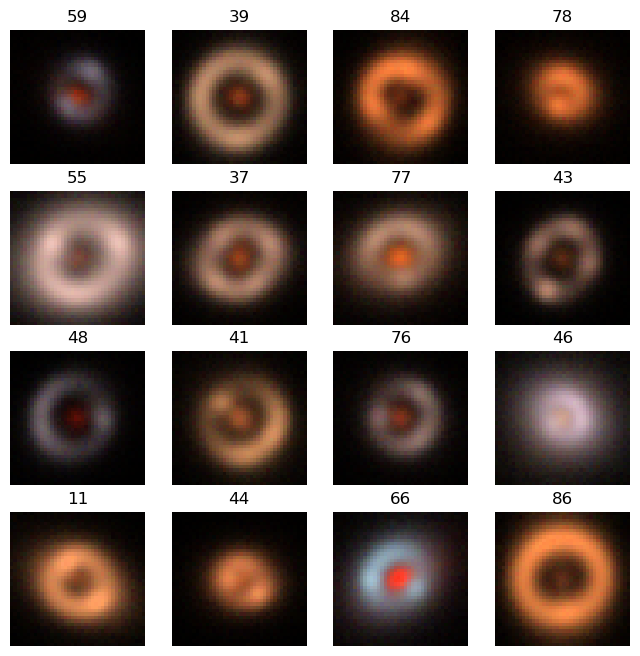

In [130]:
visualize_data(sdata)

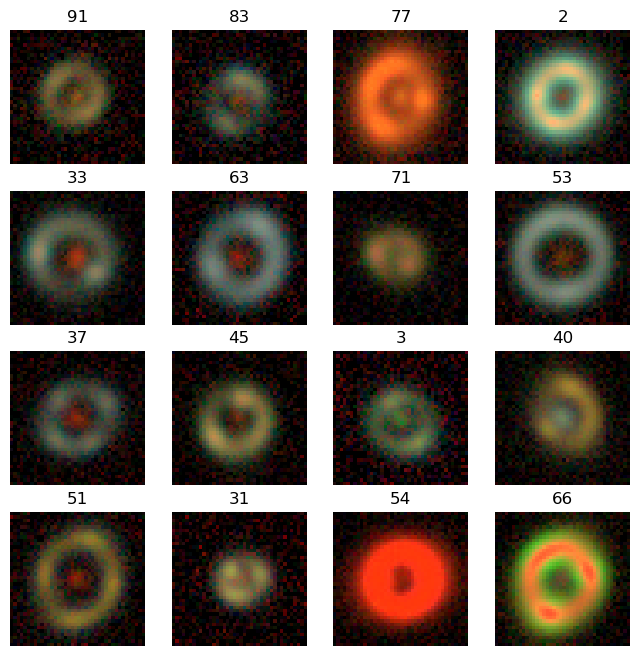

In [160]:
visualize_data(tdata)

In [154]:
import pandas as pd
smeta = pd.read_csv(targ_meta)

In [161]:
[i for i in smeta.keys() if 'theta' in i]

['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g',
 'PLANE_2-OBJECT_1-MASS_PROFILE_1-theta_E-g',
 'PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-r',
 'PLANE_2-OBJECT_1-MASS_PROFILE_1-theta_E-r',
 'PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-z',
 'PLANE_2-OBJECT_1-MASS_PROFILE_1-theta_E-z']

In [159]:
smeta[['PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g', 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r', 'PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z']].iloc[[1, 30, 12, 42, 59]]

,PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,PLANE_1-OBJECT_1-LIGHT_PROFILE_1-magnitude-z
1,21.725147,20.610872,19.945261
30,22.253803,21.270187,20.518713
12,24.382760,22.510122,20.646510
42,22.955450,21.299095,20.384596
59,23.906200,22.376060,20.972824


In [158]:
smeta[['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g', 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r', 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z']].iloc[[1, 30,12, 42, 59]]

,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z
1,21.870981,21.475230,21.358294
30,21.340805,20.297697,19.784145
12,18.375328,18.308330,18.805498
42,21.792528,20.271780,18.063868
59,20.598799,19.069805,17.758250


In [152]:
smeta[['seeing-g', 'seeing-r', 'seeing-z']].iloc[[30, 12, 32, 42, 59]]

,seeing-g,seeing-r,seeing-z
30,0.902,0.962,0.902
12,0.982,1.040,0.902
32,1.181,0.841,0.882
42,1.021,1.001,0.783
59,1.161,0.902,0.982


In [164]:
smeta['PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g'].iloc[[31, 51, 71, 77]]

31    1.332127
51    2.959877
71    1.345727
77    2.351370
Name: PLANE_1-OBJECT_1-MASS_PROFILE_1-theta_E-g, dtype: float64

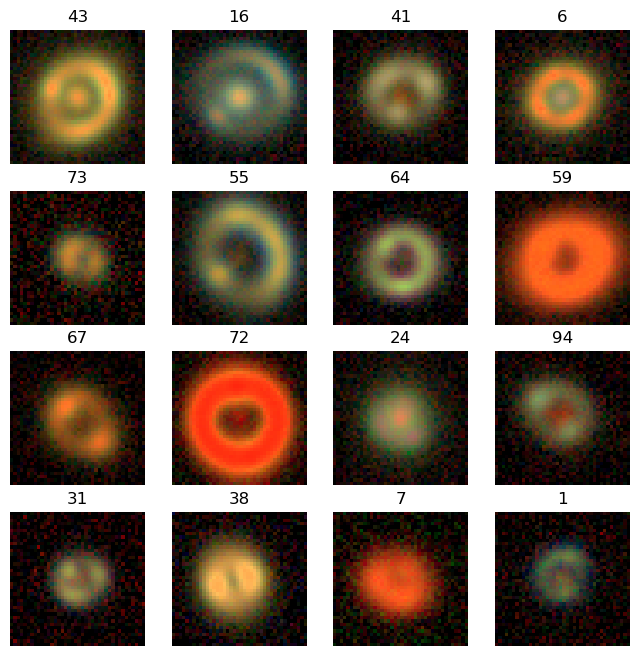

In [134]:
visualize_data(tdata)

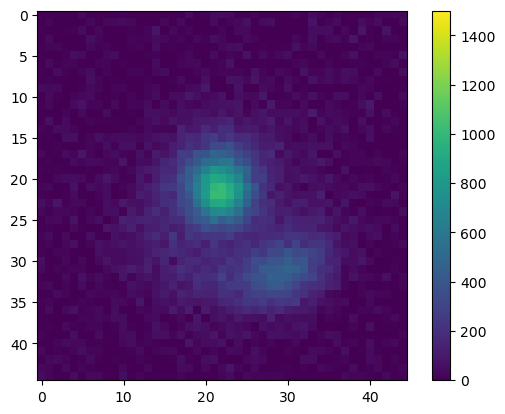

In [160]:
plt.imshow(sdata[0, 0, :, :], vmin = 0, vmax = 1500)
plt.colorbar()

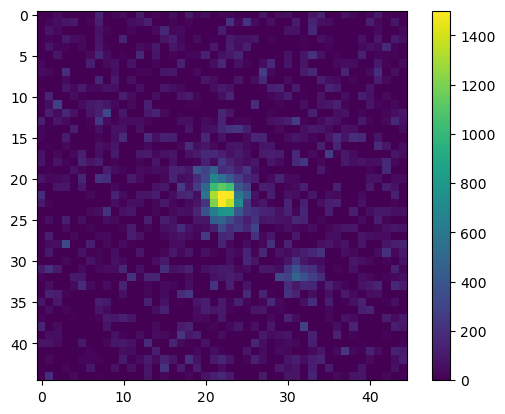

In [166]:
plt.imshow(tdata[22, 2, :, :], vmin = 0, vmax = 1500)
plt.colorbar()

In [ ]:
  USERDIST_2:
    FILENAME: ../configs/user_lens_g.txt
    MODE: interpolate
    STEP: 100
  USERDIST_3:
    FILENAME: ../configs/user_lens_r.txt
    MODE: interpolate
    STEP: 100
  USERDIST_4:
    FILENAME: ../configs/user_lens_z.txt
    MODE: interpolate
    STEP: 100

In [35]:
import pandas as pd
source_z = Path.cwd().parent / 'backgrounds/map.txt'
t = pd.read_csv(source_z, delim_whitespace = True)

In [36]:
t

,exposure_time-g,exposure_time-r,exposure_time-i,exposure_time-z,magnitude_zero_point-g,magnitude_zero_point-r,magnitude_zero_point-i,magnitude_zero_point-z
0,108.0,40.0,160.0,240.0,31.638035,30.699394,32.277115,32.466034
1,90.0,63.0,90.0,180.0,31.477333,31.402504,31.648746,31.838460
2,90.0,40.0,70.0,30.0,31.616297,30.695173,31.333422,30.025328
3,86.0,86.0,100.0,87.0,31.450940,31.573170,31.691639,31.273110
4,90.0,30.0,160.0,30.0,31.548435,30.458015,32.259125,30.167582
...,...,...,...,...,...,...,...,...
20569,90.0,53.0,90.0,172.0,31.553034,31.141245,31.718100,32.090130
20570,114.0,122.0,90.0,100.0,31.624949,31.978525,31.704601,31.498419
20571,200.0,200.0,200.0,60.0,32.446670,32.622753,32.552940,30.985960
20572,40.0,100.0,90.0,113.0,30.642925,31.843204,31.632883,31.618350


In [37]:
t = t.drop(columns = ['exposure_time-i', 'magnitude_zero_point-i'])

In [39]:
t[['magnitude_zero_point-g', 'magnitude_zero_point-r', 'magnitude_zero_point-z']] = t[['magnitude_zero_point-g', 'magnitude_zero_point-r', 'magnitude_zero_point-z']].round(6)

In [40]:
t.to_csv('../backgrounds/map.txt', sep='\t', index = False)

In [30]:
head = Path.cwd().parents[1]
source_img_path = head / 'data/mb_lenscolor_source/mb_lenscolor_source.npy'
source_meta = head / 'data/mb_lenscolor_source/mb_lenscolor_source_metadata.csv'

In [31]:
import pandas as pd
t = pd.read_csv(source_meta)

In [53]:
idx = [i[16:] for i in dataset.search('magnitude')['SOURCE']]

In [54]:
idx

['PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g',
 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r',
 'PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z']

t[idx]

In [42]:
t.keys()

Index(['OBJID-g', 'H0-g', 'Om0-g', 'exposure_time-g', 'numPix-g',
       'pixel_scale-g', 'psf_type-g', 'read_noise-g', 'ccd_gain-g', 'seeing-g',
       ...
       'PLANE_2-OBJECT_1-MASS_PROFILE_1-e2-z',
       'PLANE_2-OBJECT_1-MASS_PROFILE_1-center_x-z',
       'PLANE_2-OBJECT_1-MASS_PROFILE_1-center_y-z', 'BACKGROUND_IDX-z',
       'PLANE_1-REDSHIFT-g', 'PLANE_2-REDSHIFT-g', 'PLANE_1-REDSHIFT-r',
       'PLANE_2-REDSHIFT-r', 'PLANE_1-REDSHIFT-z', 'PLANE_2-REDSHIFT-z'],
      dtype='object', length=195)

In [9]:
import pandas as pd
lenses = pd.read_csv("../configs/source_colors_with_zlens.txt", delim_whitespace=True)

In [10]:
lenses

,CONFIGURATION_1-PLANE_2-OBJECT_1-REDSHIFT,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,CONFIGURATION_1-PLANE_1-OBJECT_1-REDSHIFT,WEIGHT
0,1.493197,21.875757,21.723236,20.283205,0.280203,1.0
1,1.442902,21.044741,22.096289,21.414358,0.691930,1.0
2,1.430981,21.641100,21.675371,21.397528,0.685003,1.0
3,1.561445,21.906784,21.832739,19.981070,0.589351,1.0
4,1.305264,20.681000,20.718277,19.972401,0.327502,1.0
...,...,...,...,...,...,...
7589,1.379176,21.611582,21.355047,20.137066,0.675972,1.0
7590,1.313136,21.916191,21.592533,21.433886,0.496264,1.0
7591,1.898150,20.859800,21.048883,20.247503,0.659321,1.0
7592,1.386898,21.544487,21.832838,20.642092,0.282309,1.0


In [11]:
lens_new = lenses[['CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g', 'CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r', 'CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z', 'WEIGHT']] - 2

In [12]:
lens_new['WEIGHT'] = 1.0

In [13]:
lens_new

,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-g,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-r,CONFIGURATION_1-PLANE_2-OBJECT_1-LIGHT_PROFILE_1-magnitude-z,WEIGHT
0,19.875757,19.723236,18.283205,1.0
1,19.044741,20.096289,19.414358,1.0
2,19.641100,19.675371,19.397528,1.0
3,19.906784,19.832739,17.981070,1.0
4,18.681000,18.718277,17.972401,1.0
...,...,...,...,...
7589,19.611582,19.355047,18.137066,1.0
7590,19.916191,19.592533,19.433886,1.0
7591,18.859800,19.048883,18.247503,1.0
7592,19.544487,19.832838,18.642092,1.0


In [15]:
lens_new.to_csv("../configs/lens_colors.txt", sep='\t', index = False)